In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Učitavanje podataka
df = pd.read_csv('ulazni_podaci_vsl2.csv')
df.head()

,Naziv_proteina,molska_frakcija_za_A,molska_frakcija_za_C,molska_frakcija_za_D,molska_frakcija_za_E,molska_frakcija_za_F,molska_frakcija_za_G,molska_frakcija_za_H,molska_frakcija_za_I,molska_frakcija_za_K,...,molska_frakcija_za_N,molska_frakcija_za_P,molska_frakcija_za_Q,molska_frakcija_za_R,molska_frakcija_za_S,molska_frakcija_za_T,molska_frakcija_za_V,molska_frakcija_za_W,molska_frakcija_za_Y,Klasifikacija
0,AAD14585.1|virion spike glycoprotein precursor,0.0677,0.0262,0.0502,0.0524,0.0611,0.0852,0.0197,0.0786,0.0459,...,0.0459,0.0459,0.0371,0.0568,0.0328,0.0873,0.0568,0.0306,0.0284,uređen
1,AAD14585.1|virion spike glycoprotein precursor,0.0780,0.0000,0.0550,0.0550,0.0092,0.0642,0.0413,0.0275,0.0413,...,0.0734,0.0642,0.0459,0.0321,0.1514,0.1514,0.0413,0.0000,0.0092,neuređen
2,AAQ55048.1|virion spike glycoprotein precursor,0.0700,0.0263,0.0481,0.0525,0.0613,0.0853,0.0197,0.0788,0.0460,...,0.0460,0.0460,0.0372,0.0547,0.0328,0.0875,0.0569,0.0306,0.0284,uređen
3,AAQ55048.1|virion spike glycoprotein precursor,0.0822,0.0000,0.0548,0.0594,0.0046,0.0639,0.0411,0.0228,0.0411,...,0.0731,0.0776,0.0457,0.0411,0.1370,0.1507,0.0365,0.0000,0.0091,neuređen
4,ABX75367.1|virion spike glycoprotein precursor,0.0677,0.0262,0.0502,0.0524,0.0611,0.0852,0.0197,0.0786,0.0459,...,0.0459,0.0459,0.0371,0.0568,0.0328,0.0873,0.0568,0.0306,0.0284,uređen


In [3]:
# Priprema podataka
y = df['Klasifikacija']
X = df.drop(columns=['Naziv_proteina', 'Klasifikacija'], axis=1)


In [4]:
X.shape

(1278, 20)

In [5]:
y.shape

(1278,)

In [6]:
# Kodiranje ciljne promenljive
y.replace("uređen", 1, inplace=True)
y.replace("neuređen", 0, inplace=True)

/tmp/ipykernel_1123508/2341187438.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace("neuređen", 0, inplace=True)


In [7]:
# Podela na trening i test skupove
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [8]:
X_train.shape

(894, 20)

In [9]:
X_test.shape

(384, 20)

In [10]:
# Standardizacija podataka
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Primena PCA za smanjenje dimenzionalnosti na 10 komponenti
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [12]:
# Parametri za GridSearchCV za SVM
params = [
            {
                'kernel': ['linear'],
                'C': [0.01, 0.1, 1, 10],
            },
            {
                'kernel': ['rbf'],
                'C': [0.01, 0.1, 1, 10],
                'gamma': [0.01, 0.1, 1, 10],
            },
         ]

In [13]:
# Kreiranje SVM modela i GridSearchCV
model = GridSearchCV(SVC(), params, scoring='accuracy', cv=5, verbose=5)
model.fit(X_train_pca, y_train)

# Prikaz najboljih parametara i tačnosti
print(f'Najbolji parametri: {model.best_params_}')
print(f'Najbolji rezultat na trening skupu: {model.best_score_}')


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear

In [14]:
from sklearn.model_selection import cross_val_score

# Kros-validacija
scores = cross_val_score(model.best_estimator_, X_train_pca, y_train, cv=5)
print(f"Cross-validation accuracy: {scores.mean()} ± {scores.std()}")


Cross-validation accuracy: 1.0 ± 0.0


In [15]:
print(y_train.value_counts())
print(y_test.value_counts())


Klasifikacija
1    447
0    447
Name: count, dtype: int64
Klasifikacija
0    192
1    192
Name: count, dtype: int64


In [16]:
# Model sa najboljim parametrima
best_model = model.best_estimator_
best_model

SVC(C=0.01, kernel='linear')

In [17]:
# Predikcije na trening i test skupu
y_pred_train = best_model.predict(X_train_pca)
y_pred = best_model.predict(X_test_pca)

# Evaluacija modela
print(f'Tačnost na trening skupu: {accuracy_score(y_train, y_pred_train)}')
print(f'Tačnost na test skupu: {accuracy_score(y_test, y_pred)}')


Tačnost na trening skupu: 1.0
Tačnost na test skupu: 1.0


In [18]:
# F1 score za trening skup
f1_train = f1_score(y_train, y_pred_train)

# F1 score za test skup
f1_test = f1_score(y_test, y_pred)

print(f"F1 score za trening skup: {f1_train}")
print(f"F1 score za test skup: {f1_test}")

F1 score za trening skup: 1.0
F1 score za test skup: 1.0


In [19]:
# Matrica konfuzije za test skup
cm_test = confusion_matrix(y_test, y_pred)

In [20]:
#Matrica konfuzije za trening skup
cm_train = confusion_matrix(y_train, y_pred_train)

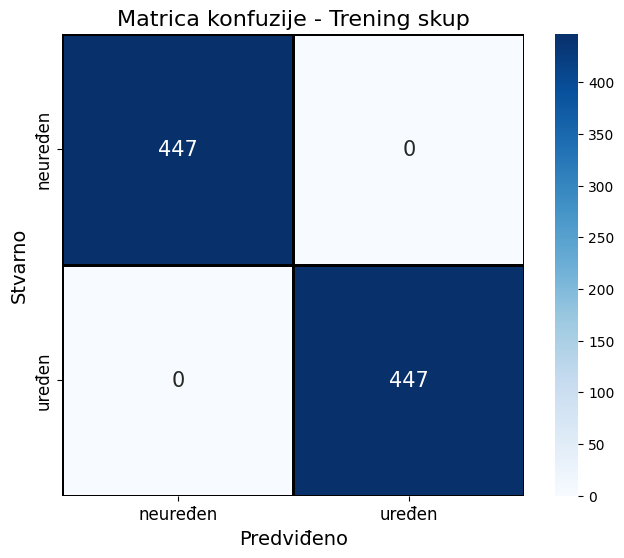

In [21]:
# Vizualizacija matrica konfuzije - trening skup
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['neuređen', 'uređen'], yticklabels=['neuređen', 'uređen'],
            cbar=True, linewidths=1, linecolor='black', square=True, annot_kws={'size': 15})
plt.xlabel('Predviđeno', fontsize=14)
plt.ylabel('Stvarno', fontsize=14)
plt.title('Matrica konfuzije - Trening skup', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

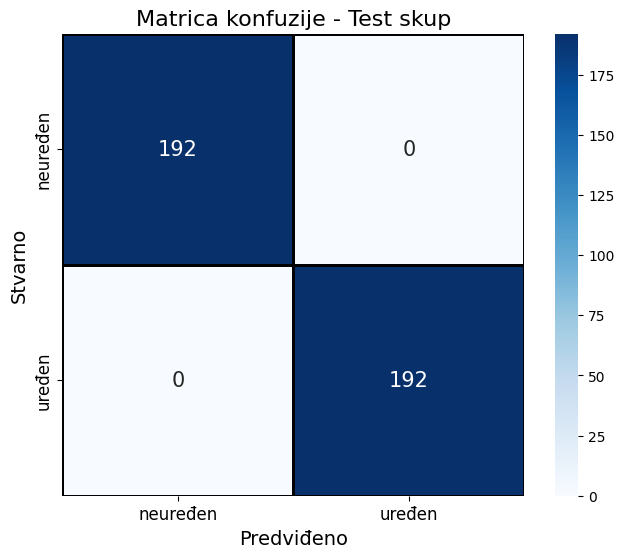

In [22]:
# Vizualizacija matrice konfuzije - test skup
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['neuređen', 'uređen'], yticklabels=['neuređen', 'uređen'],
            cbar=True, linewidths=1, linecolor='black', square=True, annot_kws={'size': 15})

# Dodavanje oznaka i naslova
plt.xlabel('Predviđeno', fontsize=14)
plt.ylabel('Stvarno', fontsize=14)
plt.title('Matrica konfuzije - Test skup', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()